In [ ]:
pwd

'/content'

# Imports Libraries

In [35]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
nltk.download('punkt')
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('stopwords')
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import gensim

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atefe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atefe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [3]:
# pip install wordcloud

# Import the Data

In [3]:
training = pd.read_csv('twitter_training.csv', encoding='iso-8859-1')
validation = pd.read_csv('twitter_validation.csv', encoding='iso-8859-1')
test = pd.read_csv('twitter_test.csv', encoding='iso-8859-1')

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
train_content_values=training['Tweet content'].values

In [6]:
training.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Removing the unnecessary columns.
training = training[['Tweet ID','sentiment','Tweet content']]
validation = validation[['Tweet ID','sentiment','Tweet content']]
test = test[['Tweet ID','sentiment','Tweet content']]

In [8]:
training

,Tweet ID,sentiment,Tweet content
0,2401,Positive,im getting on borderlands and i will murder yo...
1,2401,Positive,I am coming to the borders and I will kill you...
2,2401,Positive,im getting on borderlands and i will kill you ...
3,2401,Positive,im coming on borderlands and i will murder you...
4,2401,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,9200,Positive,Just realized that the Windows partition of my...
74678,9200,Positive,Just realized that my Mac window partition is ...
74679,9200,Positive,Just realized the windows partition of my Mac ...
74680,9200,Positive,Just realized between the windows partition of...


In [9]:
validation

,Tweet ID,sentiment,Tweet content
0,5328,Negative,@BlizzardCS whatâs going on with Hearthstone...
1,7618,Negative,@EAMaddenNFL is there a reason OFFLINE franchi...
2,7108,Negative,Johnson & Johnson is about to enter phase 3 tr...
3,10008,Negative,How is banning #PUBG going to fix anything? Al...
4,49,Neutral,I played this interesting quiz on Amazon - Try...
...,...,...,...
495,4891,Irrelevant,â­ï¸ Toronto is the arts and culture capital...
496,4359,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
497,2652,Positive,Today sucked so itâs time to drink wine n pl...
498,8069,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
test

,Tweet ID,sentiment,Tweet content
0,3364,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Neutral,Now the President is slapping Americans in the...
...,...,...,...
495,8055,Positive,special shoutouts to microsoft excel 2013
496,6787,Irrelevant,Dumb Luckyâï¸ (Fortnite Montage) youtu.be...
497,3838,Positive,Dang there goes my birthday present but maybe ...
498,2008,Irrelevant,It was ab fab seeing the 6 bungalows built in ...


In [11]:
training.shape

(74682, 3)

In [12]:
test.shape

(500, 3)

In [13]:
validation.shape

(500, 3)

# convert categorical to numeric(Sentiment)

In [14]:
training.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [15]:
training['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)
test['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)
validation['sentiment'].replace(['Positive', 'Neutral', 'Negative', 'Irrelevant'],
                        [0, 1, 2, 3], inplace=True)

# Data visualization

# Distribution of target class

<Axes: xlabel='sentiment', ylabel='count'>

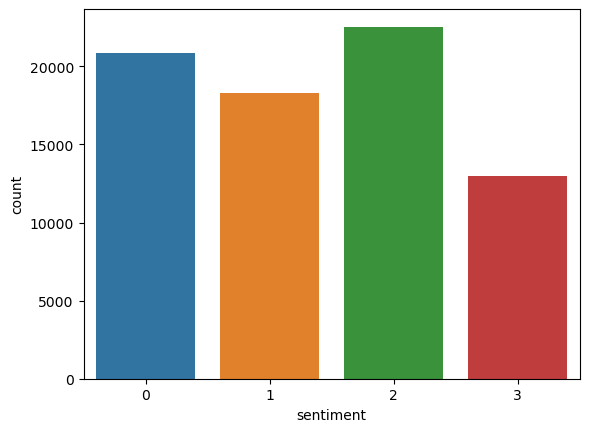

In [16]:
sns.countplot(x='sentiment',data=training)

In [17]:
# Compute class weights based on the training set
c_weights = compute_class_weight('balanced', classes=np.unique(training['sentiment']), y=training['sentiment'])
c_weightS_dict = dict(zip(np.unique(training['sentiment']), c_weights))

# Print the computed class weights and the dictionary
print("Class Weights:", c_weights)
print("Class Weight Dictionary:", c_weightS_dict)

Class Weights: [0.89624136 1.01924337 0.82825393 1.43729792]
Class Weight Dictionary: {0: 0.8962413594470046, 1: 1.0192433671798231, 2: 0.8282539260047911, 3: 1.4372979214780601}


In [18]:
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#               collocations=False).generate(" ".join(data_pos))
# plt.figure(figsize = (20,20))
# plt.imshow(wc)

# Data Cleaning

In [19]:
def clean_tweets(tweet):
    # Check if the tweet is a non-null string
    if isinstance(tweet, str) and not pd.isnull(tweet):

        # remove URL
        tweet = re.sub(r"http\S+", "", tweet)
        # convert to lower case alpha
        tweet = tweet.lower()

        # Remove short links (e.g., buff.ly/2WmmiP5)
        tweet = re.sub(r'\b(?:buff\.ly|dlvr\.it)/\S+', "", tweet)

        # Remove usernames
        tweet = re.sub(r"@[^\s]+[\s]?", '', tweet)

        # remove special characters for example {!,?,...}
        tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)

        # remove Numbers
        tweet = re.sub('[0-9]', '', tweet)

        return tweet
    else:
        # If the tweet is NaN or not a string, return it unchanged
        return tweet

# Apply the clean_tweets function to the 'Tweet content' column
training['Tweet content'] = training['Tweet content'].apply(clean_tweets)
validation['Tweet content'] = validation['Tweet content'].apply(clean_tweets)
test['Tweet content'] = test['Tweet content'].apply(clean_tweets)

In [20]:
training.shape

(74682, 3)

In [21]:
def remove_extra_spaces(df):
    df['Tweet content'] = df['Tweet content'].str.strip()
    for i in range(len(df)):
        if df['Tweet content'][i]== '':
            df['Tweet content'][i] = None 
    training.dropna(subset=['Tweet content'], inplace=True)
    training.reset_index(drop=True,inplace=True)
    return df

training = remove_extra_spaces(training)
test = remove_extra_spaces(test)
validation = remove_extra_spaces(validation)
# training['Tweet content']=training['Tweet content'].str.s

C:\Users\Atefe\AppData\Local\Temp\ipykernel_14668\761347574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet content'][i] = None


In [22]:
training.shape

(73610, 3)

In [23]:
# training.to_csv('test', sep='\t', encoding='utf-8')

In [24]:
training['Tweet content']

0        im getting on borderlands and i will murder yo...
1        i am coming to the borders and i will kill you...
2        im getting on borderlands and i will kill you all
3        im coming on borderlands and i will murder you...
4        im getting on borderlands  and i will murder y...
                               ...                        
73605    just realized that the windows partition of my...
73606    just realized that my mac window partition is ...
73607    just realized the windows partition of my mac ...
73608    just realized between the windows partition of...
73609    just like the windows partition of my mac is l...
Name: Tweet content, Length: 73610, dtype: object

In [25]:
type(training)

pandas.core.frame.DataFrame

In [26]:
# removing the stop words except "not"
stop_words = stopwords.words("english")
whitelist = ["n't", "not"]
filtered_list = [item for item in stop_words if item not in whitelist]
# Define a function to remove stop words
def remove_stop_words(word_list):
    tweet_without_stopwords = [word for word in  
                              word_list.split()
                              if word.lower() not in filtered_list]
    joined_tokens = [" ".join(tweet_without_stopwords)]
#     return tweet_without_stopwords
    return joined_tokens

In [27]:
training['Tweet content'] = training['Tweet content'].apply(remove_stop_words)
test['Tweet content'] = test['Tweet content'].apply(remove_stop_words)
validation['Tweet content'] = validation['Tweet content'].apply(remove_stop_words)

In [28]:
training

,Tweet ID,sentiment,Tweet content
0,2401,0,[im getting borderlands murder]
1,2401,0,[coming borders kill]
2,2401,0,[im getting borderlands kill]
3,2401,0,[im coming borderlands murder]
4,2401,0,[im getting borderlands murder]
...,...,...,...
73605,9200,0,[realized windows partition mac like years beh...
73606,9200,0,[realized mac window partition years behind nv...
73607,9200,0,[realized windows partition mac years behind n...
73608,9200,0,[realized windows partition mac like years beh...


In [29]:
# training.to_csv('clean_train', sep='\t', encoding='utf-8')

Stemming

In [30]:
#stem the words
ps = PorterStemmer()
# Define a function to stem the words
def stemming(word_list):
    tweet_with_stem = []
    split_list = [word for sentence in word_list for word in sentence.split()]
    for w in split_list:
        w = ps.stem(w)
        tweet_with_stem.append(w)
    return tweet_with_stem

In [31]:
training['Tweet content'] = training['Tweet content'].apply(stemming)
test['Tweet content'] = test['Tweet content'].apply(stemming)
validation['Tweet content'] = validation['Tweet content'].apply(stemming)

In [32]:
training

,Tweet ID,sentiment,Tweet content
0,2401,0,"[im, get, borderland, murder]"
1,2401,0,"[come, border, kill]"
2,2401,0,"[im, get, borderland, kill]"
3,2401,0,"[im, come, borderland, murder]"
4,2401,0,"[im, get, borderland, murder]"
...,...,...,...
73605,9200,0,"[realiz, window, partit, mac, like, year, behi..."
73606,9200,0,"[realiz, mac, window, partit, year, behind, nv..."
73607,9200,0,"[realiz, window, partit, mac, year, behind, nv..."
73608,9200,0,"[realiz, window, partit, mac, like, year, behi..."


In [33]:
# lemmatizer = WordNetLemmatizer()
# with tqdm(total=len(training['Tweet content'])) as pbar:
#     for tweet in training['Tweet content']:
#         lemmatized = [lemmatizer.lemmatize(word) for word in tweet]
#         tweets.append(lemmatized)
#         pbar.update(1)

# Word embedding

# W2V

In [40]:
X_train = training['Tweet content']
SIZE = 50
model = gensim.models.Word2Vec(X_train
, min_count=1
, vector_size=SIZE
, window=5
, workers=4)
model.wv.most_similar('hi', topn=3)

[('hello', 0.9060459733009338),
 ('hey', 0.8979060053825378),
 ('ghostrecon', 0.8853891491889954)]

In [46]:
def compute_avg_w2v_vector(w2v_dict, tweet):
    list_of_word_vectors = [w2v_dict[w] for w in tweet if w in w2v_dict.key_to_index.keys()]
    if len(list_of_word_vectors) == 0:
        result = [0.0]*SIZE
    else:
        result = np.sum(list_of_word_vectors, axis=0) / len(list_of_word_vectors)
        
    return result

In [47]:
training['W2v'] = training['Tweet content'].apply(lambda x: compute_avg_w2v_vector(model.wv, x))
test['W2v'] = test['Tweet content'].apply(lambda x: compute_avg_w2v_vector(model.wv, x))
validation['W2v'] = validation['Tweet content'].apply(lambda x: compute_avg_w2v_vector(model.wv, x))

In [54]:
len(training['W2v'][1000])

50

In [213]:
test['glove'] = test['Tweet content'].apply(embedd)

In [214]:
validation['glove'] = validation['Tweet content'].apply(embedd)

In [215]:
training['glove'] = training['Tweet content'].apply(embedd)

In [216]:
training['glove'].shape

(73610,)

In [217]:
len(training['glove'][1])

100

In [218]:
training.dropna(subset=['glove'], inplace=True)

In [219]:
training['glove'].shape

(73610,)

# Train Model

# Random Forest

In [55]:
# Create X_train and y_train
X_train_RF = np.vstack(training['W2v'].to_numpy())
y_train_RF = np.array(training['sentiment'])

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=c_weightS_dict)
rf_model.fit(X_train_RF, y_train_RF)

RandomForestClassifier(class_weight={0: 0.8962413594470046,
                                     1: 1.0192433671798231,
                                     2: 0.8282539260047911,
                                     3: 1.4372979214780601},
                       random_state=42)

In [56]:
X_test_RF = np.vstack(test['W2v'].to_numpy())
y_test_RF = np.array(test['sentiment'])

In [57]:
# Predictions
rf_predictions = rf_model.predict(X_test_RF)

# Evaluate

In [58]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_RF, rf_predictions, average=average_setting)
recall = recall_score(y_test_RF, rf_predictions, average=average_setting)
f1 = f1_score(y_test_RF, rf_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_RF, rf_predictions)

# Print additional metrics
print("RF Precision:", precision)
print("RF Recall:", recall)
print("RF F1-Score:", f1)
print("RF Confusion Matrix:")
print(conf_matrix)


RF Precision: 0.8883871126353703
RF Recall: 0.8788929492206585
RF F1-Score: 0.8822629942684953
RF Confusion Matrix:
[[133   6   5   4]
 [  9 117   8   0]
 [  1   6 117   2]
 [  7   2   8  75]]


In [59]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test_RF, rf_predictions)
print("RF Accuracy:", rf_accuracy)
print("RF Classification Report:")
print(classification_report(y_test_RF, rf_predictions))

RF Accuracy: 0.884
RF Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       148
           1       0.89      0.87      0.88       134
           2       0.85      0.93      0.89       126
           3       0.93      0.82      0.87        92

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



In [60]:
# Create X_val and y_val
X_val_RF = np.vstack(validation['W2v'].to_numpy())
y_val_RF = np.array(validation['sentiment'])

In [61]:
# Make predictions on the Twitter-validation dataset
validation['predicted RF W2v'] = rf_model.predict(X_val_RF)
# Save the result to an Excel file
validation.to_excel('RF_validation_w2v.xlsx', index=False)

In [62]:
validation

,Tweet ID,sentiment,Tweet content,W2v,predicted RF W2v
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[0.10745893, -0.6231127, -0.01949474, 0.420772...",2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.014914964, -0.7025625, -0.26694527, 0.0071...",2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.17915028, -0.08081439, 0.9860153, -0.341124...",2
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[0.14647946, -0.3018616, 0.040271103, 0.021447...",2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.09565098, -1.7299399, 0.42340872, 0.649577...",1
...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[0.08433795, -0.4540689, 0.29474062, -0.054828...",3
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[0.102719866, -0.69867307, -0.09255285, 0.4414...",3
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[0.03667931, -0.6240968, -0.110848814, 0.68520...",0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.13981943, -1.5053986, 0.4236864, -0.214958...",0


# Results

In [65]:
result_RF = pd.read_excel('RF_validation_w2v.xlsx')
true_sentiment = result_RF['sentiment']
predicted_sentiment = result_RF['predicted RF W2v']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 453


# Train Model

# AdaBoost

In [143]:
# Create X_train and y_train
X_train_AB = np.vstack(training['W2v'].to_numpy())
y_train_AB = np.array(training['sentiment'])

In [68]:
# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost model with sample weights
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
sample_weights = np.array([c_weightS_dict[y] for y in y_train_AB])
adaboost_model.fit(X_train_AB, y_train_AB, sample_weight=sample_weights)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [144]:
X_test_AB = np.vstack(test['W2v'].to_numpy())
y_test_AB = np.array(test['sentiment'])

In [145]:
# Predictions
ab_predictions = adaboost_model.predict(X_test_AB)

# Evaluate

In [146]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_AB, ab_predictions, average=average_setting)
recall = recall_score(y_test_AB, ab_predictions, average=average_setting)
f1 = f1_score(y_test_AB, ab_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_AB, ab_predictions)

# Print additional metrics
print("AB Precision:", precision)
print("AB Recall:", recall)
print("AB F1-Score:", f1)
print("AB Confusion Matrix:")
print(conf_matrix)

AB Precision: 0.484769507907985
AB Recall: 0.48875365005313093
AB F1-Score: 0.4832265448990143
AB Confusion Matrix:
[[76 25 23 24]
 [21 51 24 38]
 [14 16 83 13]
 [24 14 17 37]]


In [147]:
# Calculate accuracy
ab_accuracy = accuracy_score(y_test_AB, ab_predictions)
print("AB Accuracy:", ab_accuracy)
print("AB Classification Report:")
print(classification_report(y_test_AB, ab_predictions))

AB Accuracy: 0.494
AB Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       148
           1       0.48      0.38      0.42       134
           2       0.56      0.66      0.61       126
           3       0.33      0.40      0.36        92

    accuracy                           0.49       500
   macro avg       0.48      0.49      0.48       500
weighted avg       0.50      0.49      0.49       500



In [148]:
# Create X_val and y_val
X_val_AB = np.vstack(validation['W2v'].to_numpy())
y_val_AB = np.array(validation['sentiment'])

In [151]:
# Make predictions on the Twitter-validation dataset
validation['predicted AB W2v'] = ab_predictions(X_val_AB)
# Save the result to an Excel file
validation.to_excel('AB_validation_w2v.xlsx', index=False)

TypeError: 'numpy.ndarray' object is not callable

In [150]:
validation

,Tweet ID,sentiment,Tweet content,W2v,predicted RF W2v,predicted AB W2v,predicted LR W2v,predicted SVM W2v
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[0.10745893, -0.6231127, -0.01949474, 0.420772...",2,2,2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.014914964, -0.7025625, -0.26694527, 0.0071...",2,2,2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.17915028, -0.08081439, 0.9860153, -0.341124...",2,2,1,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[0.14647946, -0.3018616, 0.040271103, 0.021447...",2,2,2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.09565098, -1.7299399, 0.42340872, 0.649577...",1,1,1,1
...,...,...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[0.08433795, -0.4540689, 0.29474062, -0.054828...",3,3,1,1
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[0.102719866, -0.69867307, -0.09255285, 0.4414...",3,3,0,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[0.03667931, -0.6240968, -0.110848814, 0.68520...",0,0,0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.13981943, -1.5053986, 0.4236864, -0.214958...",0,0,1,1


# Results

In [85]:
result_RF = pd.read_excel('AB_validation_w2v.xlsx')
true_sentiment = result_RF['sentiment']
predicted_sentiment = result_RF['predicted AB W2v']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 453


# Train Model

# Logistic Regression

In [87]:
# Create X_train and y_train
X_train_LR = np.vstack(training['W2v'].to_numpy())
y_train_LR = np.array(training['sentiment'])

In [88]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, class_weight=c_weightS_dict,max_iter=1000)
lr_model.fit(X_train_LR, y_train_LR)

LogisticRegression(class_weight={0: 0.8962413594470046, 1: 1.0192433671798231,
                                 2: 0.8282539260047911, 3: 1.4372979214780601},
                   max_iter=1000, random_state=42)

In [109]:
X_test_LR = np.vstack(test['W2v'].to_numpy())
y_test_LR = np.array(test['sentiment'])

In [110]:
# Predictions
lr_predictions = lr_model.predict(X_test_LR)

# Evaluate

In [111]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_LR, lr_predictions, average=average_setting)
recall = recall_score(y_test_LR, lr_predictions, average=average_setting)
f1 = f1_score(y_test_LR, lr_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_LR, lr_predictions)

# Print additional metrics
print("LR Precision:", precision)
print("LR Recall:", recall)
print("LR F1-Score:", f1)
print("LR Confusion Matrix:")
print(conf_matrix)

LR Precision: 0.5017010480103178
LR Recall: 0.5056573909591431
LR F1-Score: 0.5031969114227602
LR Confusion Matrix:
[[83 33 11 21]
 [24 54 32 24]
 [15 18 80 13]
 [20 20 13 39]]


In [112]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test_LR, lr_predictions)
print("AB Accuracy:", lr_accuracy)
print("AB Classification Report:")
print(classification_report(y_test_LR, lr_predictions))

AB Accuracy: 0.512
AB Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       148
           1       0.43      0.40      0.42       134
           2       0.59      0.63      0.61       126
           3       0.40      0.42      0.41        92

    accuracy                           0.51       500
   macro avg       0.50      0.51      0.50       500
weighted avg       0.51      0.51      0.51       500



In [113]:
# Create X_val and y_val
X_val_LR = np.vstack(validation['W2v'].to_numpy())
y_val_LR = np.array(validation['sentiment'])

In [133]:
# Make predictions on the Twitter-validation dataset
validation['predicted LR W2v'] = lr_model.predict(X_val_LR)
# Save the result to an Excel file
validation.to_excel('LR_validation_w2v.xlsx', index=False)

In [134]:
validation

,Tweet ID,sentiment,Tweet content,W2v,predicted RF W2v,predicted AB W2v,predicted LR W2v,predicted SVM W2v
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[0.10745893, -0.6231127, -0.01949474, 0.420772...",2,2,2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.014914964, -0.7025625, -0.26694527, 0.0071...",2,2,2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.17915028, -0.08081439, 0.9860153, -0.341124...",2,2,1,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[0.14647946, -0.3018616, 0.040271103, 0.021447...",2,2,2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.09565098, -1.7299399, 0.42340872, 0.649577...",1,1,1,1
...,...,...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[0.08433795, -0.4540689, 0.29474062, -0.054828...",3,3,1,1
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[0.102719866, -0.69867307, -0.09255285, 0.4414...",3,3,0,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[0.03667931, -0.6240968, -0.110848814, 0.68520...",0,0,0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.13981943, -1.5053986, 0.4236864, -0.214958...",0,0,1,1


# Results

In [135]:
result_LR = pd.read_excel('LR_validation_w2v.xlsx')
true_sentiment = result_LR['sentiment']
predicted_sentiment = result_LR['predicted LR W2v']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 254


# Train Model

# SVM

In [117]:
# Create X_train and y_train
X_train_SVM = np.vstack(training['W2v'].to_numpy())
y_train_SVM = np.array(training['sentiment'])

In [118]:
# SVM Model
svm_model = SVC(kernel='linear', C=1.0, class_weight=c_weightS_dict)
svm_model.fit(X_train_SVM, y_train_SVM)

SVC(class_weight={0: 0.8962413594470046, 1: 1.0192433671798231,
                  2: 0.8282539260047911, 3: 1.4372979214780601},
    kernel='linear')

In [120]:
X_test_SVM = np.vstack(test['W2v'].to_numpy())
y_test_SVM = np.array(test['sentiment'])

In [122]:
# Predictions
svm_predictions = svm_model.predict(X_test_SVM)

# Evaluate

In [123]:
# Replace 'binary' with the desired average setting ('micro', 'macro', 'weighted', or None)
average_setting = 'macro'
# Calculate precision, recall, and F1-score with the specified average setting and conf_matrix
precision = precision_score(y_test_SVM, svm_predictions, average=average_setting)
recall = recall_score(y_test_SVM, svm_predictions, average=average_setting)
f1 = f1_score(y_test_SVM, svm_predictions, average=average_setting)
conf_matrix = confusion_matrix(y_test_SVM, svm_predictions)

# Print additional metrics
print("LR Precision:", precision)
print("LR Recall:", recall)
print("LR F1-Score:", f1)
print("LR Confusion Matrix:")
print(conf_matrix)

LR Precision: 0.5153990344614074
LR Recall: 0.5231688244747946
LR F1-Score: 0.516139742864328
LR Confusion Matrix:
[[83 26 13 26]
 [22 50 30 32]
 [15 17 83 11]
 [20 14 12 46]]


In [124]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_test_SVM, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test_SVM, svm_predictions))

SVM Accuracy: 0.524
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.58       148
           1       0.47      0.37      0.41       134
           2       0.60      0.66      0.63       126
           3       0.40      0.50      0.44        92

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.53      0.52      0.52       500



In [125]:
# Create X_val and y_val
X_val_SVM = np.vstack(validation['W2v'].to_numpy())
y_val_SVM = np.array(validation['sentiment'])

In [129]:
# Make predictions on the Twitter-validation dataset
validation['predicted SVM W2v'] = svm_model.predict(X_val_SVM)
# Save the result to an Excel file
validation.to_excel('SVM_validation_w2v.xlsx', index=False)

In [130]:
validation

,Tweet ID,sentiment,Tweet content,W2v,predicted RF W2v,predicted AB W2v,predicted LR W2v,predicted SVM W2v
0,5328,2,"[what, go, hearthston, ipad, delet, app, redow...","[0.10745893, -0.6231127, -0.01949474, 0.420772...",2,2,2,2
1,7618,2,"[reason, offlin, franchis, lag, much, everi, p...","[-0.014914964, -0.7025625, -0.26694527, 0.0071...",2,2,2,2
2,7108,2,"[johnson, johnson, enter, phase, trial, covid,...","[0.17915028, -0.08081439, 0.9860153, -0.341124...",2,2,2,1
3,10008,2,"[ban, pubg, go, fix, anyth, gonna, make, every...","[0.14647946, -0.3018616, 0.040271103, 0.021447...",2,2,2,2
4,49,1,"[play, interest, quiz, amazon, tri, luck, chan...","[-0.09565098, -1.7299399, 0.42340872, 0.649577...",1,1,1,1
...,...,...,...,...,...,...,...,...
495,4891,3,"[toronto, art, cultur, capit, canada, wonder, ...","[0.08433795, -0.4540689, 0.29474062, -0.054828...",3,3,3,1
496,4359,3,"[actual, good, move, tot, bring, viewersi, one...","[0.102719866, -0.69867307, -0.09255285, 0.4414...",3,3,3,0
497,2652,0,"[today, suck, time, drink, wine, n, play, bord...","[0.03667931, -0.6240968, -0.110848814, 0.68520...",0,0,0,0
498,8069,0,"[bought, fraction, microsoft, today, small, win]","[-0.13981943, -1.5053986, 0.4236864, -0.214958...",0,0,0,1


# Results

In [131]:
result_SVM = pd.read_excel('SVM_validation_w2v.xlsx')
true_sentiment = result_SVM['sentiment']
predicted_sentiment = result_SVM['predicted SVM W2v']
# Calculate the number of correct predictions
correct_predictions = sum(true_sentiment == predicted_sentiment)
# Print the number of correct predictions
print(f'Number of Correct Predictions: {correct_predictions}')

Number of Correct Predictions: 255


###############################################

از اینجا به بهد من یه روشی رو رفتم برای word 2vec و خواستم باشه.

# Word Embedding

Word2Vec

In [ ]:
# Python program to generate word vectors using Word2Vec
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action = 'ignore')
import gensim
from gensim.models import Word2Vec

data = []
# Check for NaN values and replace them with an empty string
# training['Tweet content'].fillna('', inplace=True)
# Define the function to tokenize sentences


In [ ]:
training.shape

In [ ]:
nltk.download('punkt')

In [ ]:
data = []
f = training['Tweet content']
# iterate through each sentence in the file

def tokenize_sentence(sentence):
    # tokenize the sentence into words
     if isinstance(sentence, str):  # Check if the value is a string
        return word_tokenize(sentence)


# Apply the tokenization function to the 'Tweet content' column
training['Tweet content'] = training['Tweet content'].apply(tokenize_sentence)
test['Tweet content'] = test['Tweet content'].apply(tokenize_sentence)
validation['Tweet content'] = validation['Tweet content'].apply(tokenize_sentence)

In [ ]:
training['Tweet content']

In [ ]:
test['Tweet content']

In [ ]:
# Create CBOW model
model1 = gensim.models.Word2Vec(training['Tweet content'], min_count = 1, vector_size = 100, window = 5)

In [ ]:
# Create CBOW model
model2 = gensim.models.Word2Vec(test['Tweet content'], min_count = 1, vector_size = 100, window = 5)

In [ ]:
# Create CBOW model
model3 = gensim.models.Word2Vec(validation['Tweet content'], min_count = 1, vector_size = 100, window = 5)

In [ ]:
print("Cosine similarity betweene' " +
               " : ",
    model1.wv.similarity('see', 'look'))

In [ ]:
X= list(model1.wv.index_to_key)
X

In [ ]:
word_to_check = "so"
if word_to_check in model1.wv:
    word_embedding = model1.wv[word_to_check]
print(word_embedding)

In [ ]:
# def get_embedding(sentence):
#     embeddings = [model1.wv[word] for word in sentence if word in model1.wv]

In [ ]:
training['Tweet content'][0]

In [ ]:
def embed_word_lists(list_of_lists, model):
    vec = np.zeros(100).reshape((1, 100))
    count = 0
    embeddings = []

    for word_list in list_of_lists:

        try:
            vec +=

            word_embeddings = [model.wv[word] for word in word_list if word in model.wv]

        if not word_embeddings:
            # Append zeros if no embeddings are available for the entire list
            embeddings.append([0] * model.vector_size)
        else:
            # Concatenate the embeddings for each word in the list
            list_embedding = np.concatenate(word_embeddings)
            embeddings.append(list_embedding)

    return embeddings

# Apply the embedding function to your list of lists
embedded_lists = embed_word_lists(training['Tweet content'], model1)
embedded_lists_test = embed_word_lists(test['Tweet content'], model2)
embedded_lists_validation = embed_word_lists(validation['Tweet content'], model3)

# 'embedded_lists' now contains the Word2Vec embeddings for each inner list


In [ ]:
print(len(embedded_lists[0]))

In [ ]:
training['embedding'] = embedded_lists

In [ ]:
test['embedding'] = embedded_lists_test

In [ ]:
validation['embedding'] = embedded_lists_validation

In [ ]:
# training['embedding'][0]

In [ ]:
print(training[['Tweet content', 'embedding']])

In [ ]:
data=model1.wv.most_similar("see")
print(data)

In [ ]:
# Assuming 'embedding' is a column in your DataFrame containing the embedding vectors
X_train = training['embedding']  # Convert the list of arrays to a 2D array
y_train = training['sentiment']

In [ ]:
# Find the maximum length of sequences in the 'embedding' column
max_length = max(training['embedding'].apply(len))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Find the maximum length of sequences in the 'embedding' column
max_length = max(training['embedding'].apply(len))

In [ ]:
max_length

# Creating Word Embeddings using Word2Vec model

In [ ]:
X_data, y_data = np.array(training['Tweet content']), np.array(training['sentiment'])
X_data_v, y_data_v = np.array(validation['Tweet content']), np.array(validation['sentiment'])

In [ ]:
X_data = X_data.tolist()

In [ ]:
X_data_v = X_data_v.tolist()

In [ ]:
type(X_data)

In [ ]:
X_data

In [ ]:
X_data_v

In [ ]:
Embedding_dimensions = 100
# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_data))
Word2vec_train_data_v = list(map(lambda x: x.split(), X_data_v))

In [ ]:
# u_data = ['im getting on borderlands and i will murder you all']
# Word2vec_train_data = list(map(lambda x: x.split(), u_data))

In [ ]:
Word2vec_train_data

In [ ]:
Word2vec_train_data_v

 word2vec_model train

In [ ]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))#unique values

In [ ]:
word2vec_model

word2vec_model valid

In [ ]:
# Defining the model and training it.
word2vec_model_v = Word2Vec(Word2vec_train_data_v,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model_v.wv.key_to_index))#unique values

# Tokenizing and Padding datasets

In [ ]:
# Defining the model input length.
input_length = 60

In [ ]:
vocab_length = 15000
tokenizer_t = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer_t.fit_on_texts(X_data)
tokenizer_t.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

In [ ]:
vocab_length = 15000
tokenizer_v = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer_v.fit_on_texts(X_data_v)
tokenizer_v.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

In [ ]:
X_data = pad_sequences(tokenizer_t.texts_to_sequences(X_data), maxlen=input_length)
X_data_v = pad_sequences(tokenizer_v.texts_to_sequences(X_data_v), maxlen=input_length)

# Creating Embedding Matrix

In [ ]:
embedding_matrix_t = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer_t.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

In [ ]:
embedding_matrix_v = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer_v.word_index.items():
    if word2vec_model_v.wv.__contains__(word):
        embedding_matrix_v[token] = word2vec_model_v.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix_v.shape)

# Creating the Model

In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix_t],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
training_model = getModel()
training_model.summary()

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import keras_metrics as km
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
pip install keras-metrics

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.BinaryCrossentropy()])

In [ ]:
history = training_model.fit(
    X_data, y_data,
    batch_size=1024,
    epochs=5,
    validation_data=(X_data_v, y_data_v),
    callbacks=callbacks,
    verbose=1,
)

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [163]:
from gensim.models import word2vec
import nltk
raw_text = """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The result is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.""".split()
# tokenize sentences in corpus

In [164]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in raw_text]
# Set values for various parameters
feature_size = 100    # Word vector dimensionality
window_context = 30          # Context window size
min_word_count = 1   # Minimum word count
sample = 1e-3   # Downsample setting for frequent words
w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size,
                          window=window_context, min_count=min_word_count,
                          sample=sample)
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['extract','information','insights']}
similar_words

{'extract': ['of', 'artificial', ')', 'linguistics', 'interactions'],
 'information': ['within',
  'subfield',
  'intelligence',
  'technology',
  'accurately'],
 'insights': ['them', 'technology', 'contextual', 'data', 'program']}